In [1]:
import prey_capture_python as preycap
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import interpolate
# from scipy import signal

In [5]:
file='/Volumes/molly/2022-02-24_9-49-09_mouse-0898/Sky_mouse-0898_2022-02-24T09_49_09DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [6]:
file

'/Volumes/molly/2022-02-24_9-49-09_mouse-0898/Sky_mouse-0898_2022-02-24T09_49_09DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [7]:
mouse_xy, cricket_p, cricket_xy, rear_xy, lear_xy, headbase_xy=preycap.extract_points(file, ['Rear','Lear', 'anteriorC', 'posteriorC', 'headbase'])

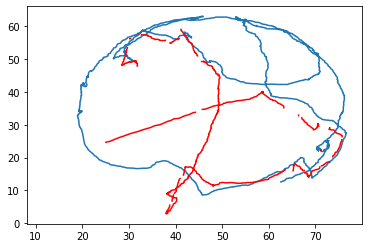

In [8]:
plt.plot(mouse_xy[0], mouse_xy[1])
plt.plot(cricket_xy[0], cricket_xy[1], color='r')

In [24]:
print(cricket_xy)
np.shape(cricket_xy)

[array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan])]


(2, 6653)

In [9]:
dist, cricket_spd, mouse_spd, az= preycap.geometries(mouse_xy, cricket_xy, rear_xy, lear_xy, headbase_xy, cricket_p)

1765
4563


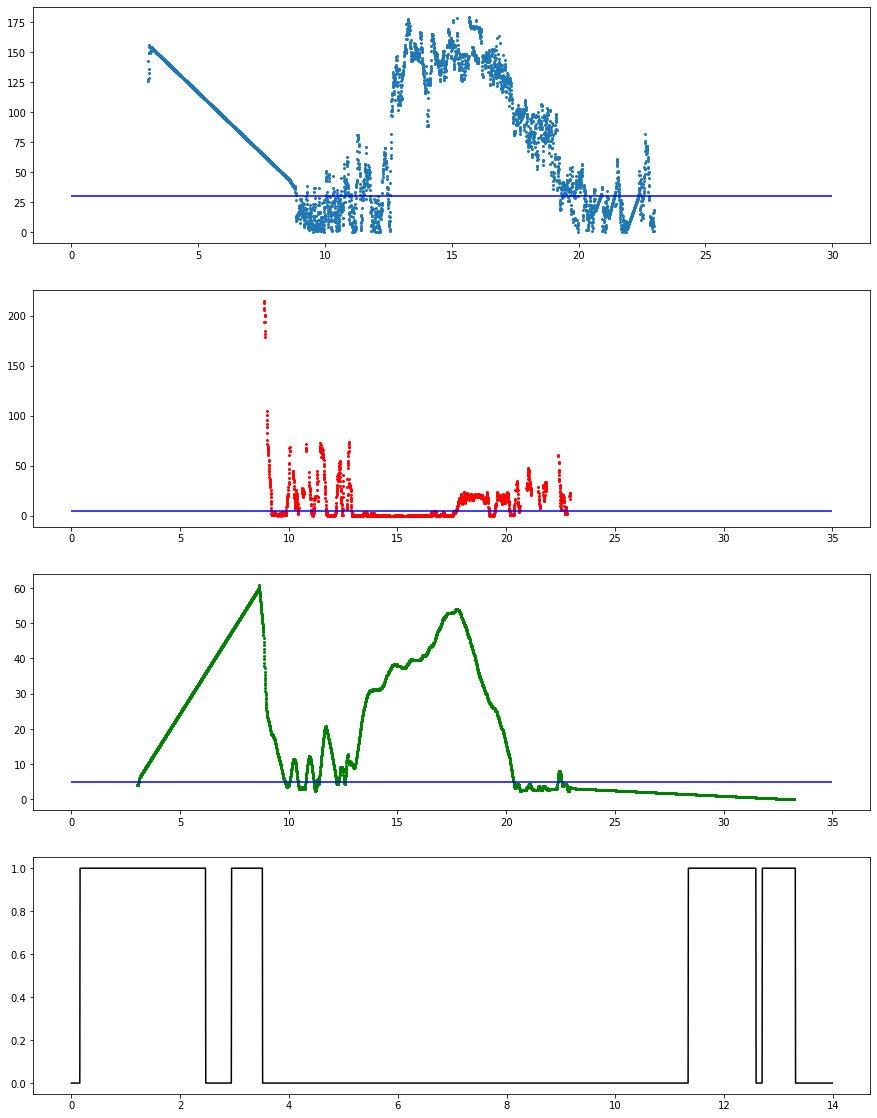

In [11]:
# plt.plot(mouse_spd)
fig=plt.figure(figsize=(15,20))
ax1,ax2,ax3,ax4=fig.subplots(4,1)
ax1.plot(np.arange(0,len(az))/200,az, linestyle='', marker='o', markersize=2)
ax1.hlines(y=30, xmin=0,xmax=6000/200, color='b')
# ax1.hlines(y=-30, xmin=0,xmax=6000/200,color='b')
ax2.plot(np.arange(0,len(cricket_spd))/200,cricket_spd, linestyle='', marker='o', markersize=2, color='r')
ax2.hlines(y=5, xmin=0,xmax=7000/200,color='b')
ax3.plot(np.arange(0,len(dist))/200,dist, linestyle='', marker='o', markersize=2, color='g')
ax3.hlines(y=5, xmin=0,xmax=7000/200,color='b')
ax4.plot(np.arange(0,len(approach))/200,approach, color='black')


In [12]:
approach,captureT, freqapproach, timetoapproach, prob_inter, prob_capture =preycap.preycap_metrics(cricket_xy, cricket_p, dist, mouse_spd, az,oldmodel=False)

1765
4563


In [13]:
captureT

13.99

In [14]:
freqapproach

0.12024650533593867

In [15]:
timetoapproach

0.155

In [16]:
prob_inter

0.75

In [17]:
prob_capture

0.3333333333333333

In [89]:
from typing import List, Union
def relentless_positivity(df: pd.DataFrame, column:str, window: int = 20, threshold: float = 0.95,tolist:bool = True) -> Union[List[List[int]], np.ndarray]:
    """
    Find ranges where column is above threshold for #window number of rows
    
    Returns:
        List of Lists indicating the start and end of positive ranges
    """
    inds=np.where(df[column].rolling(window).sum()>=threshold*window)[0]
    starts=inds[np.diff(inds, prepend=-1)!=1]-window+1
    ends=inds[np.diff(inds, append=-1)!=1]
    periods=np.column_stack([starts, ends])
    if tolist:
        return periods.tolist()
    else:
        return periods


In [90]:
data = [*[0]*100, *[.90]*40, *[0]*60, *[.90]*40]
df = pd.DataFrame({'data':data})
periods = relentless_positivity(df, 'data')
assert len(periods) == 2
assert periods[0] == [100, 139]
assert periods[1] == [200, 239]

AssertionError: 

In [54]:
periods

[[100, 139], [200, 239]]

In [81]:
start=np.min(periods)
end=np.max(periods)

In [82]:
df[start:end]

,data
100,0.9
101,0.9
102,0.9
103,0.9
104,0.9
...,...
234,0.9
235,0.9
236,0.9
237,0.9


In [80]:
np.min(periods)

100

In [83]:
cricket_p

array([nan, nan, nan, ..., nan, nan, nan])

In [92]:
df = pd.DataFrame({'data':cricket_p})

In [93]:
df

,data
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
30012,NaN
30013,NaN
30014,NaN
30015,NaN


In [94]:
periods = relentless_positivity(df, 'data')
start=np.min(periods)
end=np.max(periods)
df[start:end]

,data
1324,1.0000
1325,1.0000
1326,1.0000
1327,1.0000
1328,1.0000
...,...
27951,0.9985
27952,0.9870
27953,0.9630
27954,0.8995


In [95]:
periods

[[1324, 1343],
 [1365, 1745],
 [1752, 2499],
 [2519, 2685],
 [2689, 2829],
 [2829, 5329],
 [5336, 5635],
 [5638, 11632],
 [11634, 11736],
 [11745, 11766],
 [11769, 11810],
 [11813, 11836],
 [12322, 12347],
 [12352, 12383],
 [12387, 12412],
 [12475, 12527],
 [12622, 12646],
 [12736, 12857],
 [12905, 12986],
 [12990, 18362],
 [18364, 18634],
 [18653, 18716],
 [18723, 18775],
 [18783, 20341],
 [20340, 25732],
 [25740, 27017],
 [27020, 27722],
 [27783, 27864],
 [27874, 27956]]

In [122]:
mouse_az = np.arctan2((cricket_xy[1] - mouse_xy[1]),(cricket_xy[0] - mouse_xy[0]))*180/np.pi
head_az = np.arctan2((rear_xy[1] - lear_xy[1]),(rear_xy[0] - lear_xy[0]))*180/np.pi -90
az = mouse_az-head_az
az = np.mod(az+180,360)-180
if np.sum(~np.isnan(az))>0:
    azOld = az
    ind = np.arange(0,len(az))
    interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
    az = interp(ind)

/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in remainder
  after removing the cwd from sys.path.


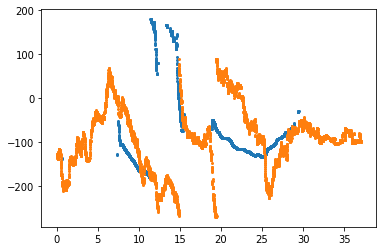

In [126]:
plt.plot(np.arange(0,len(mouse_az))/200,mouse_az, linestyle='', marker='o', markersize=2)
plt.plot(np.arange(0,len(head_az))/200,head_az, linestyle='', marker='o', markersize=2)

In [9]:
import pandas as pd
import numpy as np

def extract_points(file, bodyparts, fr=200, pix2cm=15.8, thresh=0.7 ):
    '''
    function to extract mouse and cricket xy positions from DLC output csv
    will also get the likelihood values for cricket positions
    can be adapted later to add extraction of likelihood for the mouse

    Args:
        file (str): filename/ path to the DLC output
        bodyparts (list): list of the bodypart labels from DLC you need
            added as an input since names vary across models
        fr (int): framerate of videos, default=200
        pix2cm (int): conversion from pixels to cm, default=14.5 (needs to be checked)
        thresh (int): threshold for likelihood values, default=0.7


    Returns:
        mouse_xy: xy coordinates for the mouse across the trial
        cricket_xy: xy coordinates for the cricket across trial, cricket_xy is filtered to remove points with low likelihood
        cricket_p: likelihood values of cricket points

    '''
    #set the constant values that will be used throughout
    #load relevant dlc points from the csv, limits the amount you have to work with
    data=pd.read_csv(file, skiprows=[0,1], header=[0,1])
    data=data.loc[:, bodyparts]

    #create 2d array for mouse xy coordinates
    #right now indexing df depends on order of your bodyparts lists, find a better way to deal with this
    rear_x=data[bodyparts[0],'x'].to_numpy()
    rear_y=data[bodyparts[0],'y'].to_numpy()

    lear_x=data[bodyparts[1],'x'].to_numpy()
    lear_y=data[bodyparts[1],'y'].to_numpy()

    rear_xy=np.asarray([rear_x,rear_y])
    lear_xy=np.asarray([lear_x,lear_y])
    
    headbase_x=data[bodyparts[4],'x'].to_numpy()
    headbase_y=data[bodyparts[4],'y'].to_numpy()
    headbase_xy=np.asarray([headbase_x,headbase_y])/pix2cm

    mouse_xy=0.5*(rear_xy+lear_xy)/pix2cm

    #extract cricket likelihood and xy coordinates, same indexing issue
    cricket_p=(data[bodyparts[2],'likelihood'].to_numpy()+data[bodyparts[3],'likelihood'].to_numpy())/2
    cricket_x=(data[bodyparts[2],'x'].to_numpy()+data[bodyparts[3],'x'].to_numpy())/(2*pix2cm)
    cricket_y=(data[bodyparts[2],'y'].to_numpy()+data[bodyparts[3],'y'].to_numpy())/(2*pix2cm)

    thresh_cricket_x=cricket_x.copy()
    thresh_cricket_x[cricket_p<thresh]=np.nan
    thresh_cricket_y=cricket_y.copy()
    thresh_cricket_y[cricket_p<thresh]=np.nan

    cricket_xy=[thresh_cricket_x, thresh_cricket_y]

    return mouse_xy, cricket_p, cricket_xy, rear_xy, lear_xy, headbase_xy


In [10]:
mouse_xy, cricket_p, cricket_xy, rear_xy, lear_xy, headbase_xy=extract_points(file, ['Rear','Lear', 'anteriorC', 'posteriorC','headbase'])

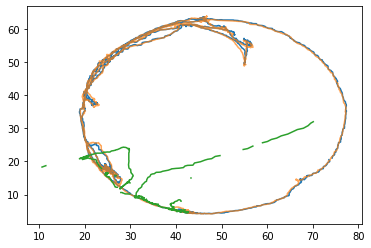

In [11]:
plt.plot(headbase_xy[0],headbase_xy[1])
plt.plot(mouse_xy[0],mouse_xy[1], alpha=0.7)
plt.plot(cricket_xy[0],cricket_xy[1])

In [13]:
    #mike has a different way of calculating azimuth, try that instead 
    #a=centerofmass to nose distance; b=center of mass to cricket distance, c=nose to to cricket distance
    #az=acosd(a^2+b^2-c^2)/2ab 
    a=np.sqrt(np.square((mouse_xy[0]-headbase_xy[0]))+np.square((mouse_xy[1]-headbase_xy[1])))
    b=np.sqrt(np.square((headbase_xy[0]-cricket_xy[0]))+np.square((headbase_xy[1]-cricket_xy[1])))
    c=np.sqrt(np.square((mouse_xy[0]-cricket_xy[0]))+np.square((mouse_xy[1]-cricket_xy[1])))
    new_az=np.arccos((np.square(a)+np.square(b)-np.square(c))/(2*a*b))

In [165]:
c=np.sqrt(np.square((mouse_xy[0]-cricket_xy[0]))+np.square((mouse_xy[1]-cricket_xy[1])))

In [166]:
b

array([nan, nan, nan, ..., nan, nan, nan])

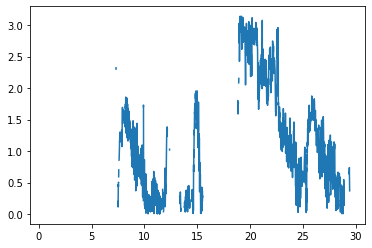

In [14]:
plt.plot(np.arange(0,len(new_az))/200,new_az)

In [15]:
new_az=(new_az*180)/np.pi

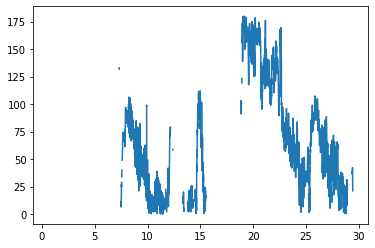

In [16]:
plt.plot(np.arange(0,len(new_az))/200,new_az)

In [18]:
from scipy import interpolate

In [23]:
if np.sum(~np.isnan(new_az))>0:
    azOld = new_az
    ind = np.arange(0,len(new_az))
    interp = interpolate.interp1d(ind[~np.isnan(new_az)], az[~np.isnan(new_az)],bounds_error=False, fill_value=np.nan )
    new_az = interp(ind)
    new_az=(new_az*180)/np.pi


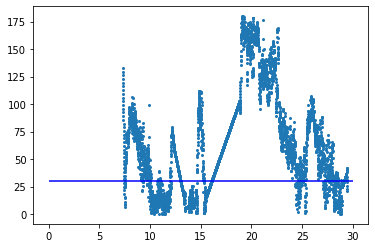

In [26]:
plt.plot(np.arange(0,len(new_az))/200,new_az,linestyle='', marker='o', markersize=2)
plt.hlines(y=30, xmin=0,xmax=6000/200, color='b')

In [70]:
import numpy as np
from numpy import linalg as la

def get_angle(centerpt, refpt, measurept):
    '''
    Function to get any angle you want.

    Args:
        centerpt (:class:`numpy.ndarray`) : nx2 array, position of center point 
            of your choice, i.e. midpoint of ears, back of head.
        refpt (:class:`numpy.ndarray`) : nx2 array, position of reference point 
            of your choice, i.e. the nose in this case.
        measurept (:class:`numpy.ndarray`) : nx2 array, position of the cricket.

    Returns:
        angle (:class:`numpy.ndarray`): nx1 array of angles across time
    '''

    #match lenght of arbitrary points chosen for ref or center point 
    # maxmeasure=np.max()

    #calculate the normalized vectors for getting the angle  
    n1=(measurept-centerpt)/la.norm((measurept-centerpt))
    n2=(refpt-centerpt)/la.norm((refpt-centerpt))

    #use arctan to get the angle at every point in time
    angle=np.empty([maxmeasure,1], dtype=float)
    print(angle)
    maxmeasure=4
    
    counter=0
    for i in range(0,maxmeasure):
        angle[i,:] = np.arctan2(la.norm(la.det((n2[i,:], n1[i,:]))), np.dot(n1[i,:], n2[i,:]))
        counter +=1
    print(angle)
    return angle

In [71]:
angle=get_angle(np.array([[0,0],[0,0],[0,0],[0,0]]),np.array([[0,1],[0,1],[0,1],[0,1]]),np.array([[1,0],[1,1],[0,1],[0,1]]))

[[1 0]
 [1 1]
 [0 1]
 [0 1]]
2.23606797749979
[[0.4472136 0.       ]
 [0.4472136 0.4472136]
 [0.        0.4472136]
 [0.        0.4472136]]
[[0.  0.5]
 [0.  0.5]
 [0.  0.5]
 [0.  0.5]]


In [52]:
print(angle)

[[1.57079633]
 [0.78539816]
 [0.        ]
 [0.        ]]


In [87]:
centerpt=np.array([[0,0],[0,0]])
# refpt=np.asarray([0,1],[0,1])
# measurept=np.asarray([1,0],[1,1])
centerpt

array([[0, 0],
       [0, 0]])

In [149]:
maxmeasure=2
len(range(0,maxmeasure))


2

In [46]:
n1=(measurept-centerpt)/la.norm((measurept-centerpt))
n2=(refpt-centerpt)/la.norm((refpt-centerpt))

NameError: name 'measurept' is not defined

In [39]:
type(n1[0])

numpy.float64

In [50]:
la.norm(la.det((n2[:], n1[:])))

1.0

In [54]:
np.dot(n1[:], n2[:])

0.0

In [61]:
i=0

In [62]:
angle = np.arctan2(la.norm(la.det((n2[i], n1[i]))), np.dot(n1[i], n2[i]))

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [59]:
angle

1.5707963267948966